Help your hedge fund manager!
You have two datasets at your disposal: Balance_Sheet.xlsx and Income_Statement.xlsx. Both these datasets have three columns in common:

"Company": The company's ticker name.
"comp_type" The type of industry the company in question belongs to. It is either "tech" for companies in the technology industry, "fmcg" for companies in the fast-moving consumer goods industry, and "real_est" for companies in the real estate industry.
"Year": The year the company's information is from.
The rest of the columns in the datasets contain information from the financial statement of the "Company" in question. Note that the columns in Balance_Sheet.xlsx only contain financial information from the balance sheet. Similarly, the columns in Income_Statement.xlsx only contain financial information from the income statement. The columns are named accordingly. For instance, the column "Total Liab" from Balance_Sheet.xlsx is the total liability.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Reading data: importing excel files

balance_sheet = pd.read_excel("/Users/lucascaula/Downloads/Projetos Programação/PYTHON/Project-Building-Financial-Reports/Balance_Sheet.xlsx")
income_statement = pd.read_excel("/Users/lucascaula/Downloads/Projetos Programação/PYTHON/Project-Building-Financial-Reports/Income_Statement.xlsx")

In [5]:
# Merging DataFrames
df_ratios = pd.merge(balance_sheet,income_statement, on=["Year", "company", "comp_type"])

In [26]:
print(df_ratios.columns)

Index(['Unnamed: 0_x', 'Year', 'comp_type', 'company', 'Accounts Payable',
       'Cash', 'Inventory', 'Property Plant Equipment',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity',
       'Unnamed: 0_y', 'Cost Of Goods Sold', 'Gross Profit',
       'Operating Income', 'Total Operating Expenses', 'Total Revenue',
       'leverage_ratio_debt_to_equity', 'leverage_ratio_equity_multiplier',
       'profitability_ratio', 'profitability_ratio_gross_revenue',
       'profitability_ratio_operating_margin'],
      dtype='object')


In [27]:
print(df_ratios.head(5))

   Unnamed: 0_x  Year comp_type company  Accounts Payable         Cash  \
0             0  2019      tech    AAPL       46236000000  48844000000   
1             1  2020      tech    AAPL       42296000000  38016000000   
2             2  2021      tech    AAPL       54763000000  34940000000   
3             3  2022      tech    AAPL       64115000000  23646000000   
4             4  2019      tech    MSFT        9382000000  11356000000   

      Inventory  Property Plant Equipment  Short Term Investments  \
0  4.106000e+09               37378000000            5.171300e+10   
1  4.061000e+09               45336000000            5.292700e+10   
2  6.580000e+09               49527000000            2.769900e+10   
3  4.946000e+09               84234000000            2.465800e+10   
4  2.063000e+09               43856000000            1.224760e+11   

   Total Assets  ...  Cost Of Goods Sold  Gross Profit  Operating Income  \
0  338516000000  ...        161782000000   98392000000       639

In [6]:
# debt-to-equity ratio: shows how much debt a company has compared to its assets ( Total debt / Total shareholder equity )
df_ratios["leverage_ratio_debt_to_equity"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# equity multiplier ratio: measures the portion of the company's assets that are financed by equity ( Total assets / Total shareholder equity )
df_ratios["leverage_ratio_equity_multiplier"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

In [9]:
# gross revenue: measures a company's profitability by comparing its gross profit to its net sales ( Total Revenue - Cost Of Goods Sold / Total Revenue )
df_ratios["profitability_ratio_gross_revenue"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# operating margin ratio: also known as return on sales, measures revenue after the deduction of operating expenses ( Total Revenue - Total Operating Expenses / Total Revenue )
df_ratios["profitability_ratio_operating_margin"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

In [14]:
# Which company type (comp_type) has the lowest profitability ratio?
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio_gross_revenue"))
lowest_profitability_by_gross_revenue = "fmcg"

print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio_operating_margin"))
lowest_profitability_by_operating_margin = "fmcg"

print("The company type which has the lowest profitabily ratio is fmcg")

           profitability_ratio_gross_revenue
comp_type                                   
fmcg                                0.514396
real_est                            0.534848
tech                                0.572062
           profitability_ratio_operating_margin
comp_type                                      
fmcg                                   0.207112
real_est                               0.299938
tech                                   0.273889

The company type which has the lowest profitabily ratio is fmcg


In [15]:
# Which company type has the highest leverage ratio?
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio_debt_to_equity"))
highest_leverage_by_debt_to_equity = "real_est"

print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio_equity_multiplier"))
highest_leverage_by_equity_multiplier = "real_est"

print("The company type which has the highest leverage ratio is real_est")

           leverage_ratio_debt_to_equity
comp_type                               
fmcg                            2.997896
real_est                        5.692041
tech                            1.777448
           leverage_ratio_equity_multiplier
comp_type                                  
fmcg                               4.049784
real_est                           7.353476
tech                               2.777448


positive


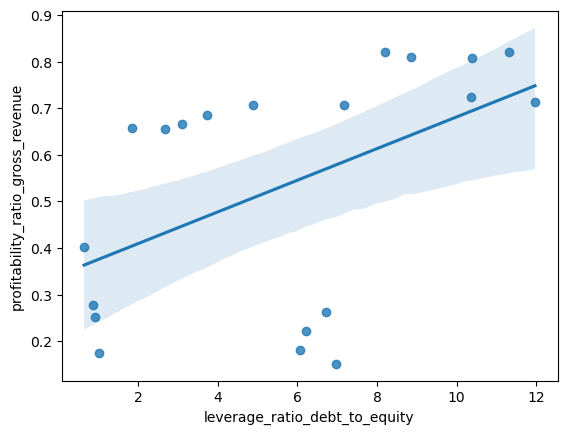

In [19]:
# What is the relationship between leverage and profitability in the real estate companies represented in this data? Is it "positive," "negative," or "no relationship"?
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
sns.regplot(data=df_real_est, x="leverage_ratio_debt_to_equity", y="profitability_ratio_gross_revenue")
relationship = "positive"

print(relationship)